In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [3]:
## Functions
def get_winning_stats(row):
    if row['outcome'] in ['home win OT','home win REG','home win SO']:
        winner = row['home_team_id']
        winner_name = row['home_team_name']
        loser = row['away_team_id']
        loser_name = row['away_team_name']
        winner_loc = 'home'
        winner_avgNumShift = row['home_avg_numShift']
        loser_avgNumShift = row['away_avg_numShift']
        winner_avgIceTime = row['home_avg_icetime']
        loser_avgIceTime  = row['away_avg_icetime']
    else:
        winner = row['away_team_id']
        winner_name = row['away_team_name']
        loser = row['home_team_id']
        loser_name = row['home_team_name']
        winner_loc = 'away'
        winner_avgNumShift = row['home_avg_numShift']
        loser_avgNumShift = row['away_avg_numShift']
        winner_avgIceTime = row['away_avg_icetime']
        loser_avgIceTime  = row['home_avg_icetime']
        
    return pd.Series({'winner':winner,
                      'winner_name':winner_name,
                      'loser':loser,
                      'loser_name':loser_name,
                      'winner_loc':winner_loc,
                      'winner_avgNumShift':winner_avgNumShift,
                      'loser_avgNumShift':loser_avgNumShift,
                      'winner_avgIceTime':winner_avgIceTime,
                      'loser_avgIceTime':loser_avgIceTime})

### 1. Plot By Avg Number of Shifts/Player

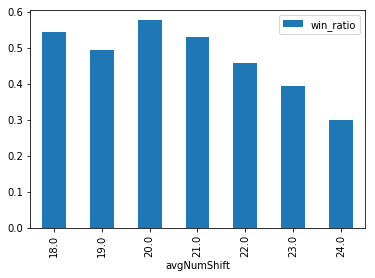

In [5]:
## Load Dataframes
game_df = pd.read_csv('data/upd_game.csv')
team_to_analyze = 'Pittsburgh Penguins'
game_df = game_df[(game_df.home_team_name == team_to_analyze) |\
                 (game_df.away_team_name == team_to_analyze)]

## Get Stats For Winning Teams
winning_df = game_df.apply(lambda x: get_winning_stats(x),axis = 1)

## Create Win Count 
win_cnt = winning_df.groupby('winner_avgNumShift')\
.agg({'winner':'count'}).reset_index()
win_cnt.columns = ['avgNumShift','win_count']

## Create Loss Count
los_cnt = winning_df.groupby('loser_avgNumShift')\
.agg({'loser':'count'}).reset_index()
los_cnt.columns = ['avgNumShift','loss_count']

## Merge Counts
winlos_cnt = win_cnt.merge(los_cnt)
winlos_cnt['win_ratio'] = winlos_cnt['win_count'] /\
(winlos_cnt['win_count'] + winlos_cnt['loss_count'])

# ## Remove Outliers
winlos_cnt = winlos_cnt[winlos_cnt.avgNumShift >= 18]
winlos_cnt = winlos_cnt[winlos_cnt.avgNumShift <= 24]

%matplotlib inline
winlos_cnt[['avgNumShift','win_ratio']].plot(x='avgNumShift',kind = 'bar')

### 2. Plot by Avg Ice Time

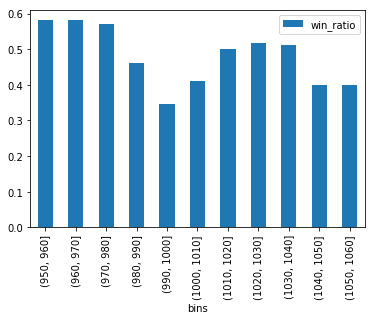

In [6]:
## Get Stats For Winning Teams
winning_df = game_df.apply(lambda x: get_winning_stats(x),axis = 1)

## Create Win Count 
win_cnt = winning_df.groupby('winner_avgIceTime')\
.agg({'winner':'count'}).reset_index()
win_cnt.columns = ['avg_IceTime','win_count']

## Create Loss Count
los_cnt = winning_df.groupby('loser_avgIceTime')\
.agg({'loser':'count'}).reset_index()
los_cnt.columns = ['avg_IceTime','loss_count']

## Merge Counts
winlos_cnt = win_cnt.merge(los_cnt)

## Remove Outliers
winlos_cnt = winlos_cnt[winlos_cnt.avg_IceTime >= 500]
winlos_cnt = winlos_cnt[winlos_cnt.avg_IceTime <= 1060]

## Bin Data, Group, and Calc Winrate
winlos_cnt['bins'] = pd.cut(winlos_cnt.avg_IceTime,bins=range(950,1070,10))
winlos_cnt = winlos_cnt.groupby('bins').agg({'win_count':'sum','loss_count':'sum'})
winlos_cnt['win_ratio'] = winlos_cnt['win_count'] /\
(winlos_cnt['win_count'] + winlos_cnt['loss_count'])
winlos_cnt.reset_index(inplace= True)

#Plot
%matplotlib inline
winlos_cnt[['bins','win_ratio']].plot(x = 'bins',kind = 'bar')